# Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_palette('muted')

# Loading dataset

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Pre-processing

In [3]:
#Dropping the RowNumber, CustomerId and Surname columns, since they won't be predictors in our model
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
#Reducing all column names and categorical features to lowercase and removing spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
#Checking for missing values
df.isna().sum()

creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

In [67]:
#Checking for duplicated rows
print('Number of duplicated rows: ', df.duplicated().sum())

Number of duplicated rows:  0


In [68]:
#Checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   creditscore         10000 non-null  int64  
 1   geography           10000 non-null  object 
 2   gender              10000 non-null  object 
 3   age                 10000 non-null  int64  
 4   tenure              10000 non-null  int64  
 5   balance             10000 non-null  float64
 6   numofproducts       10000 non-null  int64  
 7   hascrcard           10000 non-null  int64  
 8   isactivemember      10000 non-null  int64  
 9   estimatedsalary     10000 non-null  float64
 10  exited              10000 non-null  int64  
 11  complain            10000 non-null  int64  
 12  satisfaction_score  10000 non-null  int64  
 13  card_type           10000 non-null  object 
 14  point_earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
#Converting categorical columns into the 'category' type
for col in ['geography', 'gender', 'numofproducts', 'card_type', 'hascrcard', 'isactivemember', 'exited', 'complain', 'satisfaction_score']:
    df[col] = df[col].astype('category')

# Exploratory Data Analysis

In [70]:
df.describe()

,creditscore,age,tenure,balance,estimatedsalary,point_earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,1000.000000


In [71]:
#Taking a look at unique values for categorical columns
for col in df.columns:
    if df[col].dtype=='category':
        print('Column name: ', col)
        print('Number of unique values: ',df[col].nunique())
        print('All unique values: ', df[col].unique())
        print('\n')

Column name:  geography
Number of unique values:  3
All unique values:  ['france', 'spain', 'germany']
Categories (3, object): ['france', 'germany', 'spain']


Column name:  gender
Number of unique values:  2
All unique values:  ['female', 'male']
Categories (2, object): ['female', 'male']


Column name:  numofproducts
Number of unique values:  4
All unique values:  [1, 3, 2, 4]
Categories (4, int64): [1, 2, 3, 4]


Column name:  hascrcard
Number of unique values:  2
All unique values:  [1, 0]
Categories (2, int64): [0, 1]


Column name:  isactivemember
Number of unique values:  2
All unique values:  [1, 0]
Categories (2, int64): [0, 1]


Column name:  exited
Number of unique values:  2
All unique values:  [1, 0]
Categories (2, int64): [0, 1]


Column name:  complain
Number of unique values:  2
All unique values:  [1, 0]
Categories (2, int64): [0, 1]


Column name:  satisfaction_score
Number of unique values:  5
All unique values:  [2, 3, 5, 4, 1]
Categories (5, int64): [1, 2, 3, 4, 5]

In [72]:
# Define some custom functions for plotting
def category_plot(data):
    '''
    Creates a count plot for each categorical column in the input DataFrame.
    Args: 
        data (DataFrame): input DataFrame containing solely categorical columns.
    Output:
        None: prints plots using seaborn
    '''

    num_of_rows = int(np.ceil(data.shape[1]/3))
    fig, axes = plt.subplots(num_of_rows, 3, figsize=(18, 18))
    fig.suptitle(f'Frequency Analysis', fontsize=20)
    for i, col in enumerate(data.columns):
        row = int(i/3)
        column = i % 3
        sns.countplot(x = data[col], ax=axes[row, column], hue=data[col], palette='Set2', legend=False)
        axes[row, column].set_title(f'{col} Frequency', fontsize=17)
    plt.show()


def numerical_plot(data):
    '''
    Creates a histogram and a box plot for each column in the input DataFrame.
    Args: 
        data (DataFrame): input DataFrame containing solely numerical columns.
    Output:
        None: prints plots using seaborn
    '''

    for col in data.columns:
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        fig.suptitle(f'Analysis of {col}', fontsize = 20)
        #Histogram
        sns.histplot(data[col], ax=axes[0], bins = 10)
        axes[0].set_title(f'{col} Histogram', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        #Box plot
        sns.boxplot(x=data[col], ax=axes[1])
        axes[1].set_title(f'{col} Box Plot', fontsize=14)
        axes[1].set_ylabel(col, fontsize=12)
        skew = stats.skew(data[col])
        print(f'Skewness of the data in {col} is: ', skew)
        plt.show()

In [8]:
#Separating categorical and numerical columns
cat_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        num_cols.append(col)
    else:
        cat_cols.append(col)

Skewness of the data in creditscore is:  -0.07159586676212397


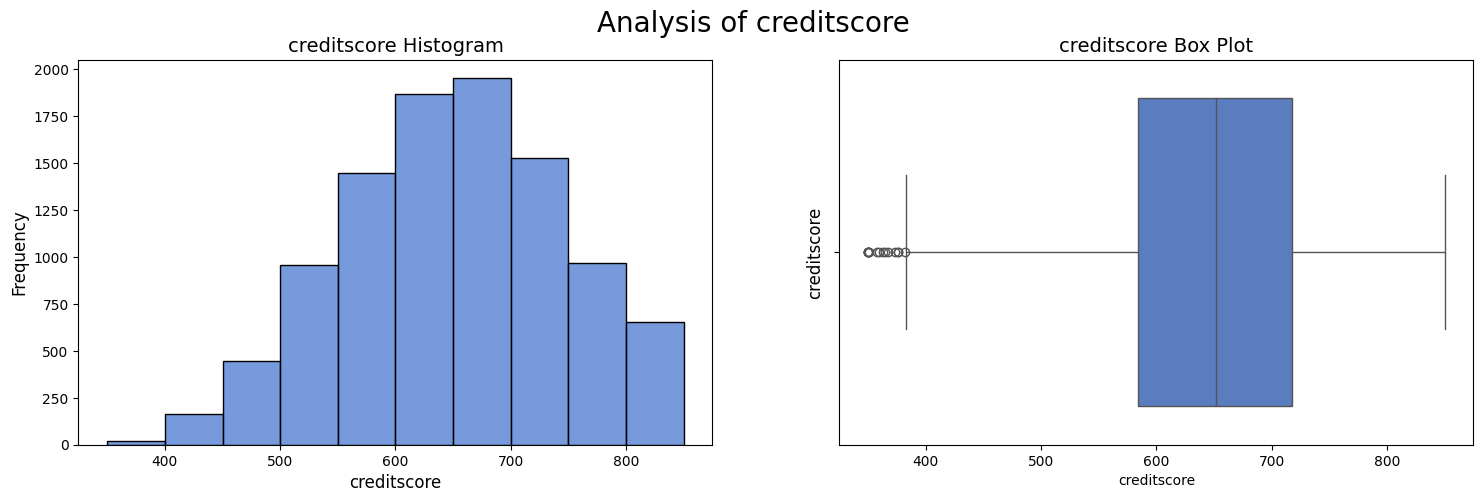

Skewness of the data in age is:  1.0111685586628079


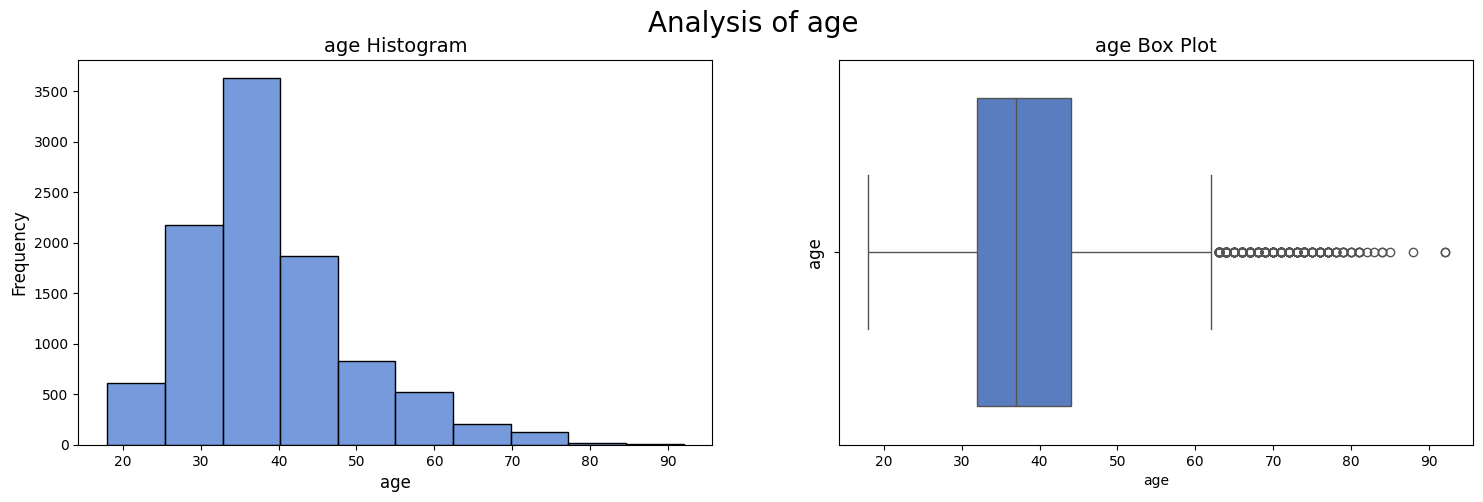

Skewness of the data in tenure is:  0.010989809189781041


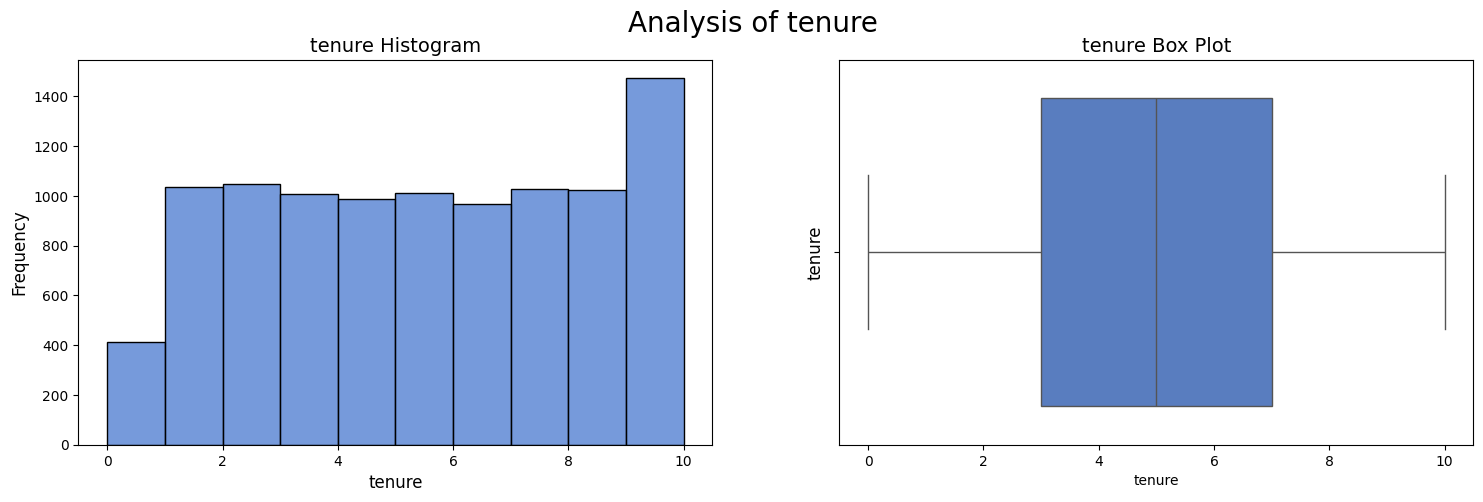

Skewness of the data in balance is:  -0.14108754375291138


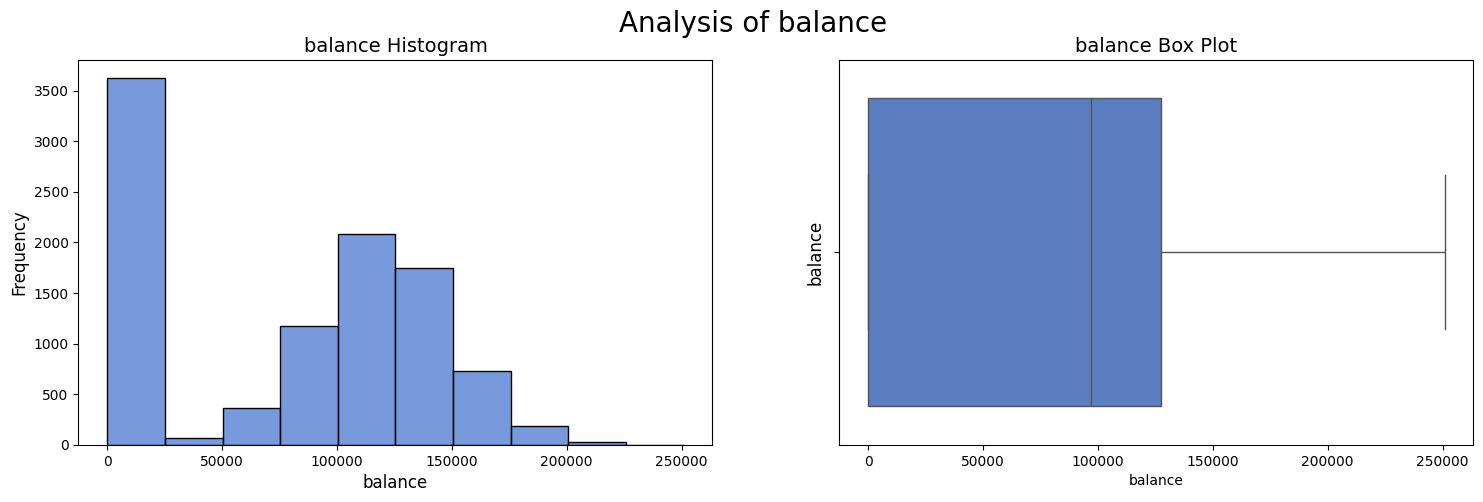

Skewness of the data in estimatedsalary is:  0.0020850448448748848


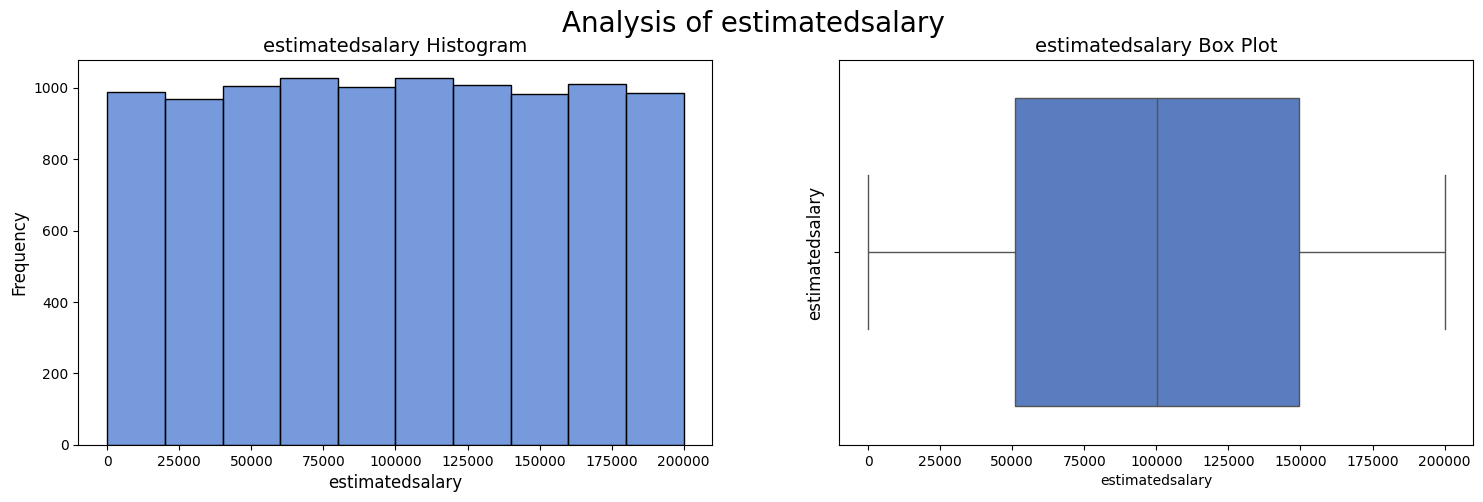

Skewness of the data in point_earned is:  0.008342861313173992


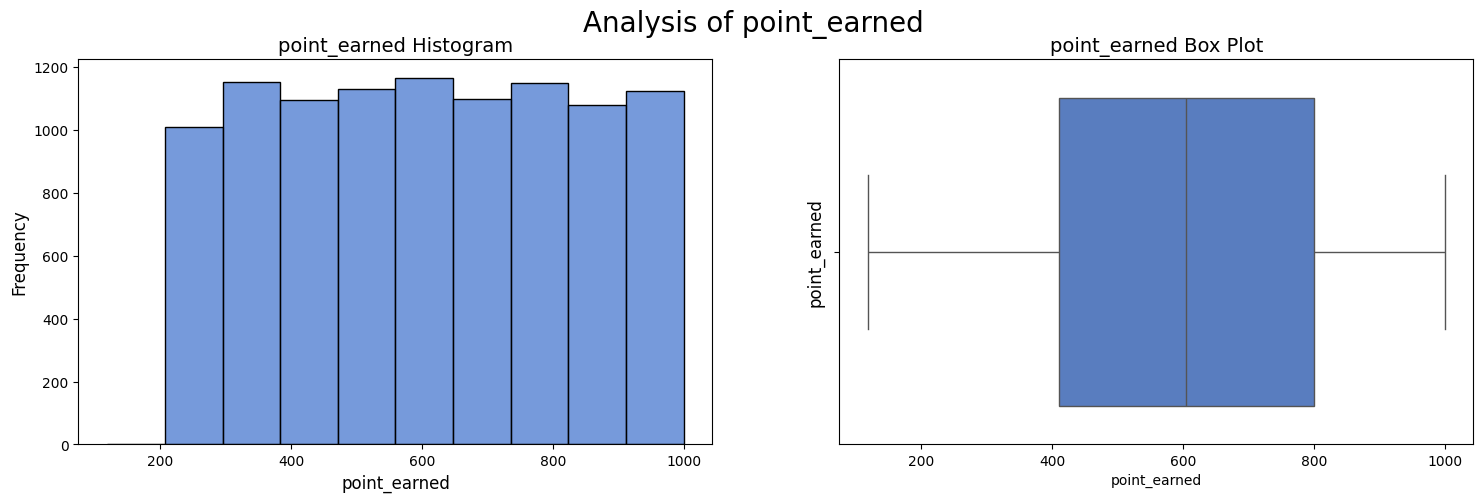

In [74]:
numerical_plot(df[num_cols])

Skewness of the data in non-zero balance is:  0.025618355798369918


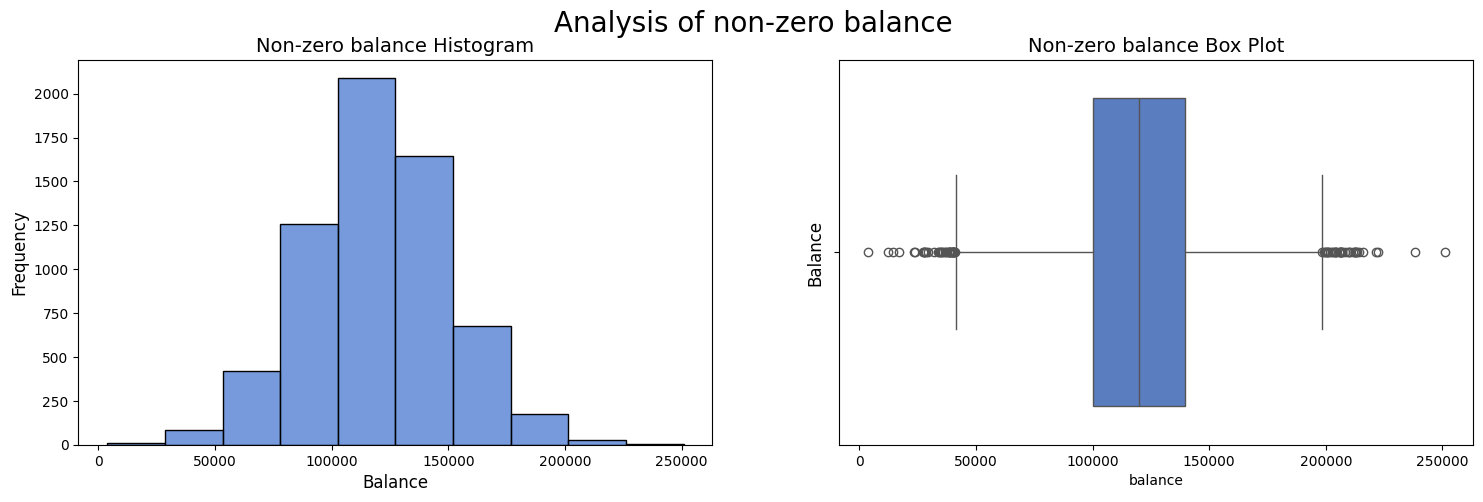

In [75]:
#Distribution of Balance, considering only accounts with non-zero balance
nonzerobalance = df[df['balance'] !=0]
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Analysis of non-zero balance', fontsize = 20)
#Histogram
sns.histplot(nonzerobalance['balance'], ax=axes[0], bins = 10)
axes[0].set_title('Non-zero balance Histogram', fontsize=14)
axes[0].set_xlabel('Balance', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
#Box plot
sns.boxplot(x=nonzerobalance['balance'], ax=axes[1])
axes[1].set_title('Non-zero balance Box Plot', fontsize=14)
axes[1].set_ylabel('Balance', fontsize=12)
skew = stats.skew(nonzerobalance['balance'])
print('Skewness of the data in non-zero balance is: ', skew)
plt.show()

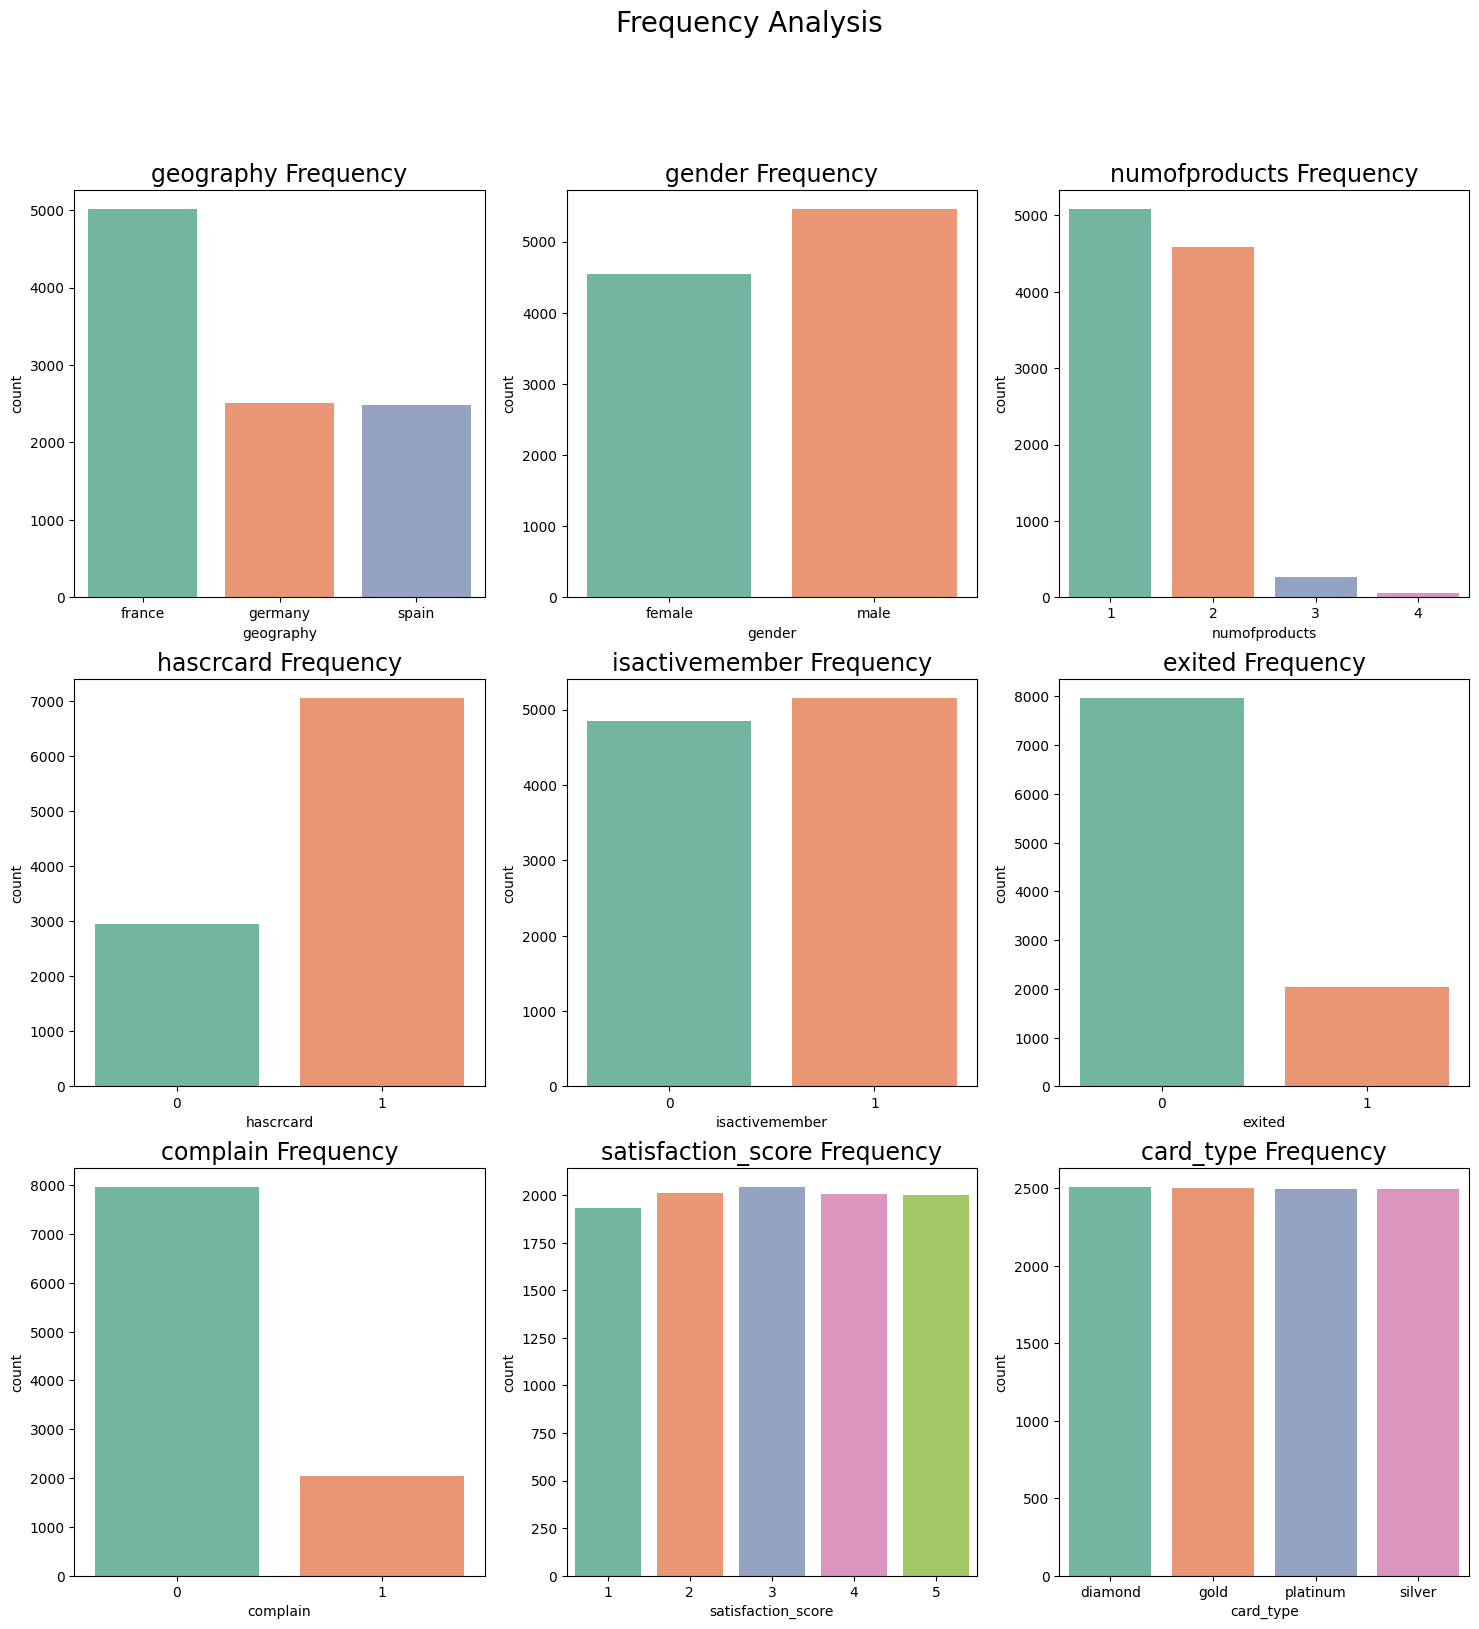

In [76]:
category_plot(df[cat_cols])

## Feature Engeneering

In [9]:
df['haszerobalance'] = (df['balance']==0).astype('int')
df['haszerobalance'] = df['haszerobalance'].astype('category')
cat_cols.append('haszerobalance')

## Exploratory Data Analysis Part II

<Axes: >

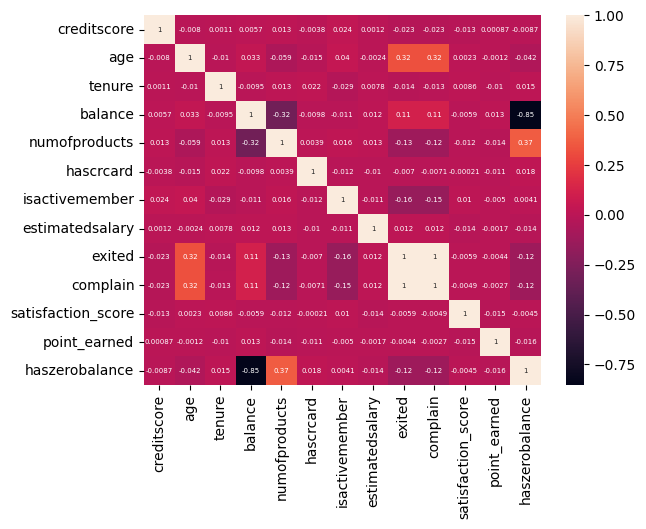

In [78]:
#correlation graph
df_corr = df.drop(['geography', 'gender', 'card_type'], axis=1)
corr = df_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, annot_kws={'size':5})

Median credit score among churning clients:  646.0
Median credit score among non-churning clients:  653.0


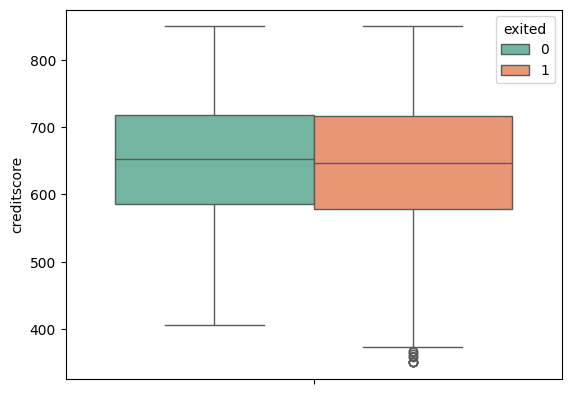

In [79]:
#Effect of credit score on churning

sns.boxplot(data = df, y='creditscore', hue ='exited', palette='Set2')

churned = df[df['exited'] == 1]
med_churned_credit = churned['creditscore'].median()
remained = df[df['exited'] == 0]
med_remained_credit = remained['creditscore'].median()
print('Median credit score among churning clients: ', med_churned_credit)
print('Median credit score among non-churning clients: ', med_remained_credit)

Median age among churning clients:  45.0
Median age among non-churning clients:  36.0


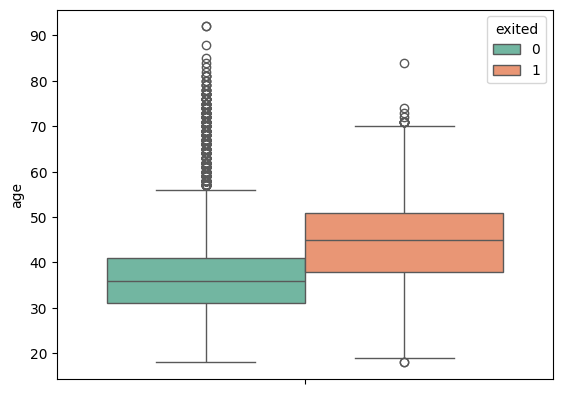

In [80]:
#Effect of age on churning

sns.boxplot(data = df, y='age', hue ='exited', palette='Set2')

med_churned_age = churned['age'].median()
med_remained_age = remained['age'].median()
print('Median age among churning clients: ', med_churned_age)
print('Median age among non-churning clients: ', med_remained_age)

Mean tenure among churning clients:  4.934739941118744
Mean tenure among non-churning clients:  5.032780708364733


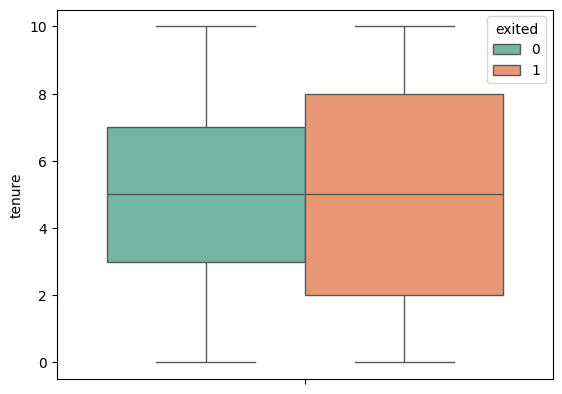

In [81]:
#Effect of tenure on churning

sns.boxplot(data = df, y='tenure', hue ='exited', palette='Set2')

mean_churned_tenure = churned['tenure'].mean()
mean_remained_tenure = remained['tenure'].mean()
print('Mean tenure among churning clients: ', mean_churned_tenure)
print('Mean tenure among non-churning clients: ', mean_remained_tenure)

<Axes: xlabel='balance', ylabel='Proportion'>

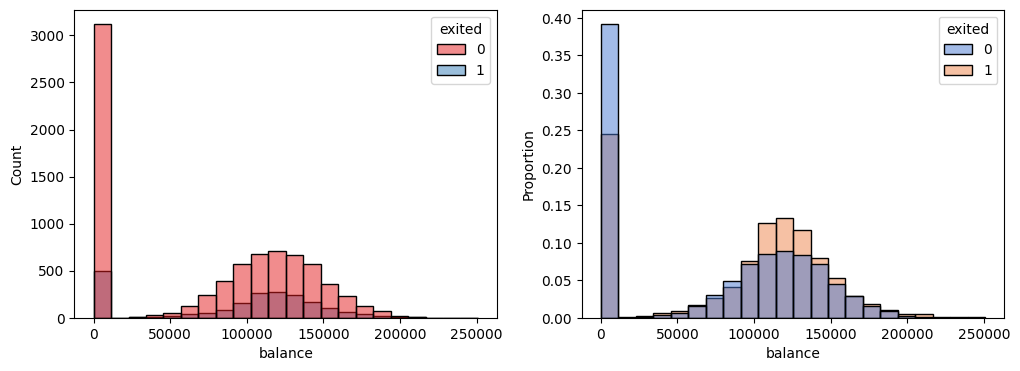

In [82]:
#Effect of balance on churning
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(ax = axes[0], data = df, x='balance', hue ='exited', palette='Set1')
sns.histplot(ax = axes[1], data=df, x= 'balance', hue='exited', stat='proportion', multiple='layer', discrete=None, common_norm=False)

Mean estimated salary among churning clients:  101509.90878312069
Mean estimated salary among non-churning clients:  99726.85314117056


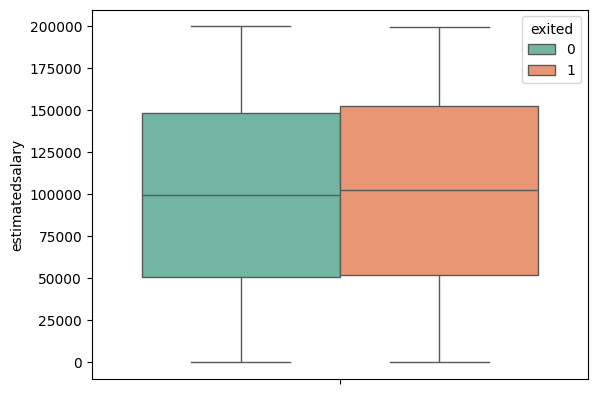

In [83]:
#Effect of estimated salary on churning

sns.boxplot(data = df, y='estimatedsalary', hue ='exited', palette='Set2')

mean_churned_salary = churned['estimatedsalary'].mean()
mean_remained_salary = remained['estimatedsalary'].mean()
print('Mean estimated salary among churning clients: ', mean_churned_salary)
print('Mean estimated salary among non-churning clients: ', mean_remained_salary)

Mean number of points earned among churning clients:  604.4484789008832
Mean number of points earned among non-churning clients:  607.0440844009042


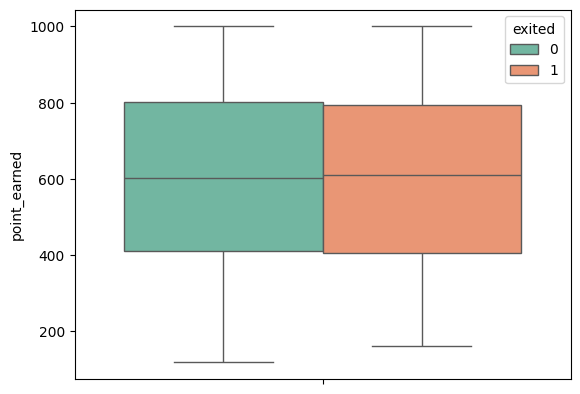

In [84]:
#Effect of points earned on churning

sns.boxplot(data = df, y='point_earned', hue ='exited', palette='Set2')

mean_churned_points = churned['point_earned'].mean()
mean_remained_points = remained['point_earned'].mean()
print('Mean number of points earned among churning clients: ', mean_churned_points)
print('Mean number of points earned among non-churning clients: ', mean_remained_points)

The churning rate for france is:  0.16174710809732748
The churning rate for germany is:  0.32443204463929853
The churning rate for spain is:  0.1667339523617279


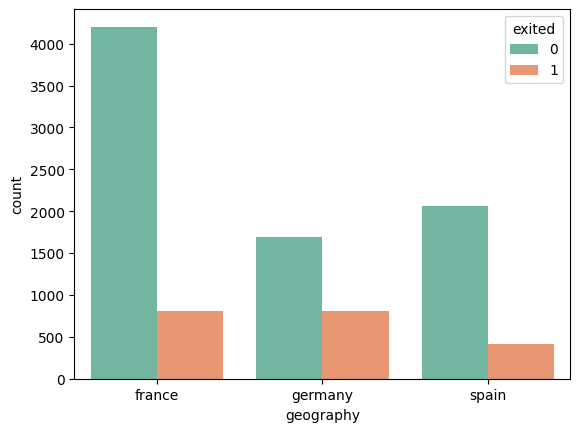

In [85]:
#Effect of geography on churning

sns.countplot(data = df, x = 'geography', hue='exited', palette='Set2')

for i in ['france', 'germany', 'spain']:
    df_country = df[df['geography']==i]
    exited_num = df_country['exited'].value_counts()[1]
    total_clients = df_country.shape[0]
    churning_rate = exited_num/total_clients
    print(f'The churning rate for {i} is: ', churning_rate)

The churning rate for female clients is:  0.2507153863086066
The churning rate for male clients is:  0.1647425325270295


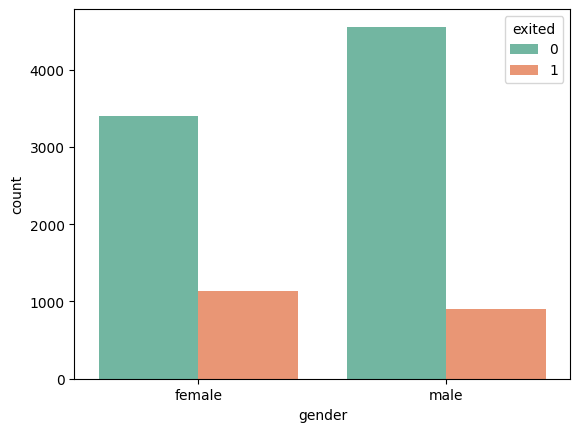

In [86]:
#Effect of gender on churning

sns.countplot(data = df, x = 'gender', hue='exited', palette='Set2')

for i in ['female', 'male']:
    df_gender = df[df['gender']==i]
    exited_num = df_gender['exited'].value_counts()[1]
    total_clients = df_gender.shape[0]
    churning_rate = exited_num/total_clients
    print(f'The churning rate for {i} clients is: ', churning_rate)

The churning rate for clients owning 1 products is:  0.27714398111723054
The churning rate for clients owning 2 products is:  0.07603485838779957
The churning rate for clients owning 3 products is:  0.8270676691729323
The churning rate for clients owning 4 products is:  1.0


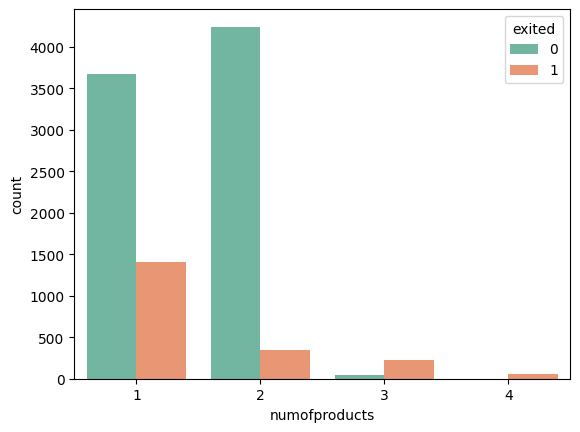

In [87]:
#Effect of the number of products owned on churning

sns.countplot(data = df, x = 'numofproducts', hue='exited', palette='Set2')

for i in range(1, 5):
    df_num = df[df['numofproducts']==i]
    exited_num = df_num['exited'].value_counts()[1]
    total_clients = df_num.shape[0]
    churning_rate = exited_num/total_clients
    print(f'The churning rate for clients owning {i} products is: ', churning_rate)

The churning rate for clients owning 0 credit cards is:  0.20814940577249574
The churning rate for clients owning 1 credit cards is:  0.20198440822111977


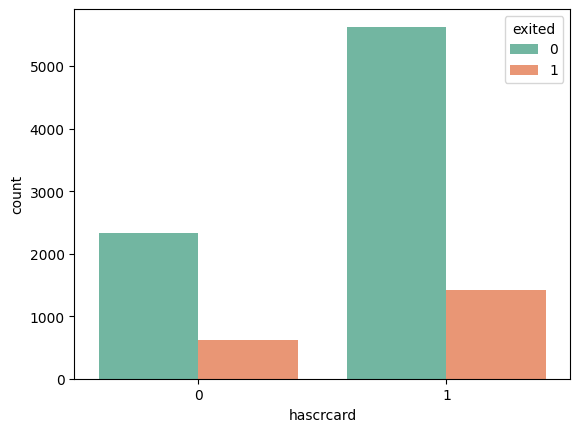

In [88]:
#Effect of owning a credit card on churning

sns.countplot(data = df, x = 'hascrcard', hue='exited', palette='Set2')

for i in range(0, 2):
    df_cr = df[df['hascrcard']==i]
    exited_cr = df_cr['exited'].value_counts()[1]
    total_clients = df_cr.shape[0]
    churning_rate = exited_cr/total_clients
    print(f'The churning rate for clients owning {i} credit cards is: ', churning_rate)

The churning rate for clients with activeness equal to 0 is:  0.26871519901010515
The churning rate for clients with activeness equal to 1 is:  0.14269073966220153


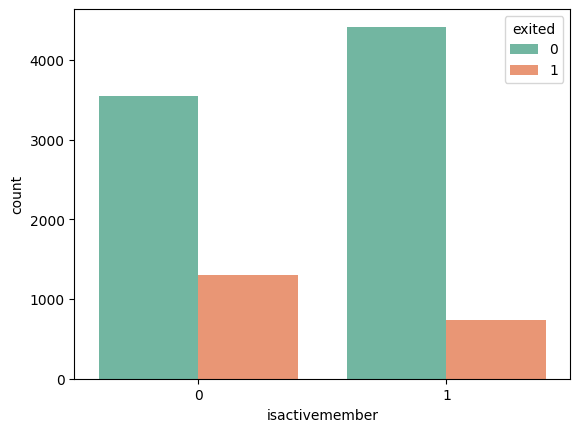

In [89]:
#Effect of being an active member on churning

sns.countplot(data = df, x = 'isactivemember', hue='exited', palette='Set2')

for i in range(0, 2):
    df_active = df[df['isactivemember']==i]
    exited_active = df_active['exited'].value_counts()[1]
    total_clients = df_active.shape[0]
    churning_rate = exited_active/total_clients
    print(f'The churning rate for clients with activeness equal to {i} is: ', churning_rate)

The churning rate for clients with complaining status equal to 0 is:  0.0005027652086475615
The churning rate for clients with complaining status equal to 1 is:  0.9951076320939335


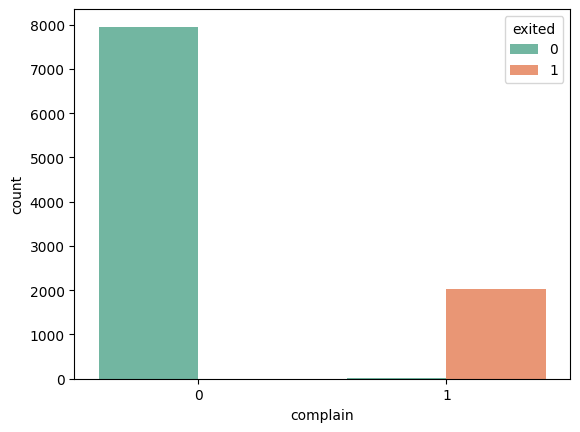

In [90]:
#Effect of having complained on churning

sns.countplot(data = df, x = 'complain', hue='exited', palette='Set2')

for i in range(0, 2):
    df_complain = df[df['complain']==i]
    exited_complain = df_complain['exited'].value_counts()[1]
    total_clients = df_complain.shape[0]
    churning_rate = exited_complain/total_clients
    print(f'The churning rate for clients with complaining status equal to {i} is: ', churning_rate)

The churning rate for clients with satisfaction score equal to 1 is:  0.20031055900621117
The churning rate for clients with satisfaction score equal to 2 is:  0.217974180734856
The churning rate for clients with satisfaction score equal to 3 is:  0.19637610186092067
The churning rate for clients with satisfaction score equal to 4 is:  0.2061752988047809
The churning rate for clients with satisfaction score equal to 5 is:  0.19810379241516965


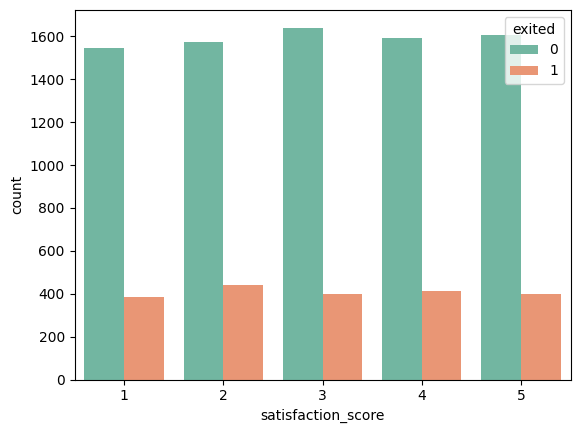

In [91]:
#Effect of satisfaction score on churning

sns.countplot(data = df, x = 'satisfaction_score', hue='exited', palette='Set2')

for i in range(1, 6):
    df_sat = df[df['satisfaction_score']==i]
    exited_sat = df_sat['exited'].value_counts()[1]
    total_clients = df_sat.shape[0]
    churning_rate = exited_sat/total_clients
    print(f'The churning rate for clients with satisfaction score equal to {i} is: ', churning_rate)

The churning rate for clients with silver card is:  0.20112179487179488
The churning rate for clients with gold card is:  0.1926458832933653
The churning rate for clients with platinum card is:  0.2036072144288577
The churning rate for clients with diamond card is:  0.2177901874750698


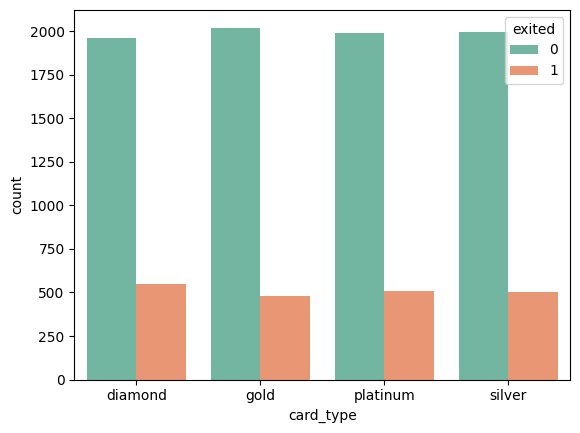

In [92]:
#Effect of card type on churning

sns.countplot(data = df, x = 'card_type', hue='exited', palette='Set2')

for i in ['silver', 'gold', 'platinum', 'diamond']:
    df_card = df[df['card_type']==i]
    exited_card = df_card['exited'].value_counts()[1]
    total_clients = df_card.shape[0]
    churning_rate = exited_card/total_clients
    print(f'The churning rate for clients with {i} card is: ', churning_rate)

<Axes: xlabel='numofproducts', ylabel='count'>

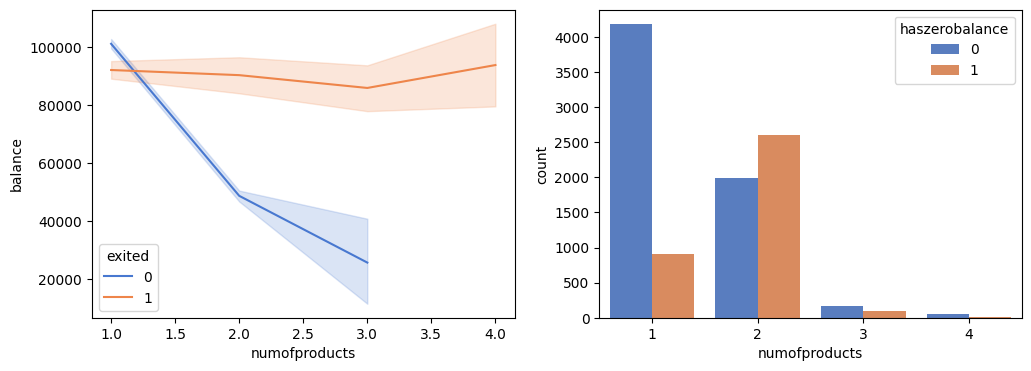

In [93]:
#Relation between number of products and balance
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(ax = axes[0], data=df, x='numofproducts', y='balance', hue='exited')
sns.countplot(ax = axes[1], data=df, x='numofproducts', hue='haszerobalance')

## Data Processing

The skewness of the age_log variable is:  0.18199280840499774


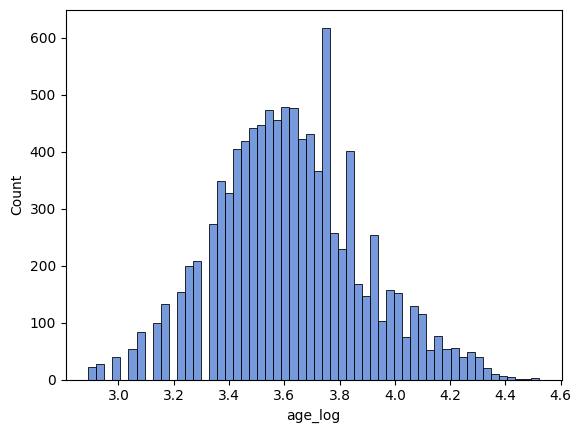

In [6]:
#Applying a logarithmic transformation to Age, in order to normalize its distribution
df['age_log'] = np.log(df['age'])
sns.histplot(data = df, x = 'age_log')
skew = stats.skew(df['age_log'])
print('The skewness of the age_log variable is: ', skew)

In [7]:
#One-hot encoding of some categorical variables
df = pd.get_dummies(df, columns=['geography', 'gender'], dtype='int')

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(['exited', 'balance', 'creditscore', 'tenure', 'estimatedsalary', 'point_earned', 'hascrcard', 'satisfaction_score', 'card_type'], axis=1)
y = df['exited']

X_arr = np.array(X)
y_arr = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.3, random_state = 778, stratify=y)

smote = SMOTE(random_state=2)

X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

In [9]:
#Standardizing X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[-0.6820666 , -0.77611248, -0.93290637, ..., -0.54929025,
        -0.99765066,  0.99765066],
       [-1.34772372, -0.77611248, -0.93290637, ..., -0.54929025,
         1.01163755, -1.01163755],
       [ 0.55415375, -0.77611248,  1.14528601, ..., -0.54929025,
        -0.99765066,  0.99765066],
       ...,
       [-1.15753597, -0.77611248, -0.93290637, ..., -0.54929025,
         1.01163755, -1.01163755],
       [-0.58697273,  2.30171785,  1.14528601, ..., -0.49444298,
         1.01163755, -1.01163755],
       [-0.58697273,  2.30171785,  0.56188167, ...,  1.17943392,
         1.01163755, -1.01163755]], shape=(4778, 10))

## Model Selection

In [16]:
#Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid=[{'C': [0.0005,0.01,0.1, 0.5, 1, 1.5],
            'penalty':['l2'],
            'max_iter':[400]}]
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 6)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.998834
Best params: {'C': 0.01, 'max_iter': 400, 'penalty': 'l2'}


In [17]:
from sklearn.tree import DecisionTreeClassifier

param_grid=[{'min_samples_split':[0.001, 0.005, 0.01, 0.1, 0.3]}]
tree = DecisionTreeClassifier(random_state=778)
grid2 = GridSearchCV(tree, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid2.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid2.best_score_, 6)))
print('Best params: {}'.format(grid2.best_params_))

Best f1-score: 0.999103
Best params: {'min_samples_split': 0.005}


In [18]:
from sklearn.ensemble import RandomForestClassifier

param_grid=[{'n_estimators':[50, 100, 200,300],
            'min_samples_split':[0.05, 0.1, 0.2, 0.3]}]
forest = RandomForestClassifier(random_state=778)
grid = GridSearchCV(forest, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 6)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.999103
Best params: {'min_samples_split': 0.1, 'n_estimators': 100}


In [13]:
from sklearn.svm import SVC

param_grid=[{'C': [0.01,0.05,0.1, 0.5, 0.7, 1, 1.5, 2]}]
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 6)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.998654
Best params: {'C': 0.7}


In [19]:
from sklearn.ensemble import AdaBoostClassifier

param_grid=[{'n_estimators':[25, 50, 100, 150],
            'learning_rate':[0.05,0.1, 0.5, 1, 1.2]}]
ada = AdaBoostClassifier(random_state=778)
grid = GridSearchCV(ada, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 4)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.9991
Best params: {'learning_rate': 0.05, 'n_estimators': 25}


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid=[{'n_estimators':[25, 50, 100, 200],
            'learning_rate':[0.1, 0.5, 1]}]
gbc = GradientBoostingClassifier(random_state=778)
grid = GridSearchCV(gbc, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 4)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.9991
Best params: {'learning_rate': 0.5, 'n_estimators': 50}


## Testing

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_tree = DecisionTreeClassifier(min_samples_split=0.005,random_state=778)
best_tree.fit(X_train, y_train)
preds = best_tree.predict(X_test)
precision = precision_score(preds, y_test)
recall = recall_score(preds, y_test)
f1 = f1_score(preds, y_test)
print('Precision on the test set: {}'.format(round(precision, 4)))
print('Recall on the test set: {}'.format(round(recall, 4)))
print('F1-score on the test set: {}'.format(round(f1, 4)))

Precision on the test set: 0.9996
Recall on the test set: 0.9987
F1-score on the test set: 0.9992


In [24]:
best_forest = RandomForestClassifier(min_samples_split=0.01,n_estimators = 100,random_state=778)
best_forest.fit(X_train, y_train)
preds = best_forest.predict(X_test)
precision = precision_score(preds, y_test)
recall = recall_score(preds, y_test)
f1 = f1_score(preds, y_test)
print('Precision on the test set: {}'.format(round(precision, 4)))
print('Recall on the test set: {}'.format(round(recall, 4)))
print('F1-score on the test set: {}'.format(round(f1, 4)))

Precision on the test set: 0.9996
Recall on the test set: 0.9987
F1-score on the test set: 0.9992


## Analysis without Complain feature

In [25]:
X = df.drop(['complain', 'exited', 'balance', 'creditscore', 'tenure', 'estimatedsalary', 'point_earned', 'hascrcard', 'satisfaction_score', 'card_type'], axis=1)
y = df['exited']

X_arr = np.array(X)
y_arr = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.3, random_state = 778, stratify=y)

smote = SMOTE(random_state=2)

X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[-0.68209834, -0.77592365, -0.93379489, ..., -0.54895249,
        -0.99733535,  0.99733535],
       [-1.34775187, -0.77592365, -0.93379489, ..., -0.54895249,
         1.01207794, -1.01207794],
       [ 0.55411535, -0.77592365,  1.14473849, ..., -0.54895249,
        -0.99733535,  0.99733535],
       ...,
       [-1.15756515, -0.77592365, -0.93379489, ..., -0.54895249,
         1.01207794, -1.01207794],
       [-0.58700498,  2.30086204,  1.14473849, ..., -0.49410458,
         1.01207794, -1.01207794],
       [-0.58700498,  2.30086204,  0.56123842, ...,  1.17979166,
         1.01207794, -1.01207794]], shape=(4778, 9))

In [28]:
#Logistic Regression
param_grid=[{'C': [0.1, 0.5, 1, 2, 2.5, 3, 3.5, 4],
            'penalty':['l2'],
            'max_iter':[400]}]
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 6)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.709803
Best params: {'C': 3.5, 'max_iter': 400, 'penalty': 'l2'}


In [31]:
#Decision Tree Classifier
param_grid=[{'min_samples_split':[0.0001, 0.0005,0.001,0.005, 0.01,0.05, 0.1]}]
tree = DecisionTreeClassifier(random_state=778)
grid2 = GridSearchCV(tree, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid2.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid2.best_score_, 6)))
print('Best params: {}'.format(grid2.best_params_))

Best f1-score: 0.856745
Best params: {'min_samples_split': 0.0001}


In [36]:
#Random Forest Classifier
param_grid=[{'n_estimators':[50, 100, 200,300, 350],
            'min_samples_split':[0.005,0.01, 0.05, 0.1]}]
forest = RandomForestClassifier(random_state=778)
grid = GridSearchCV(forest, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 6)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.852764
Best params: {'min_samples_split': 0.005, 'n_estimators': 100}


In [40]:
#SVC
from sklearn.svm import SVC
param_grid=[{'C': [1, 2, 3, 3.5, 4]}]
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 6)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.725223
Best params: {'C': 4}


In [34]:
#Ada Boosting Classifier
param_grid=[{'n_estimators':[50,100, 150, 200, 250],
            'learning_rate':[1, 1.5, 2, 2.5]}]
ada = AdaBoostClassifier(random_state=778)
grid = GridSearchCV(ada, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 4)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.831
Best params: {'learning_rate': 1.5, 'n_estimators': 200}


In [39]:
#Gradient Boosting Classifier
param_grid=[{'n_estimators':[50, 100, 200, 300],
            'learning_rate':[0.1, 0.5, 1, 1.5]}]
gbc = GradientBoostingClassifier(random_state=778)
grid = GridSearchCV(gbc, param_grid, cv=7, scoring=['f1_macro'], refit='f1_macro')
grid.fit(X_train, y_train)
print('Best f1-score: {}'.format(round(grid.best_score_, 4)))
print('Best params: {}'.format(grid.best_params_))

Best f1-score: 0.8619
Best params: {'learning_rate': 1, 'n_estimators': 100}


In [41]:
#Testing
best_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1, random_state=778)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
precision = precision_score(preds, y_test)
recall = recall_score(preds, y_test)
f1 = f1_score(preds, y_test)
print('Precision on the test set: {}'.format(round(precision, 4)))
print('Recall on the test set: {}'.format(round(recall, 4)))
print('F1-score on the test set: {}'.format(round(f1, 4)))

Precision on the test set: 0.8669
Recall on the test set: 0.8927
F1-score on the test set: 0.8796
